# Business Understanding

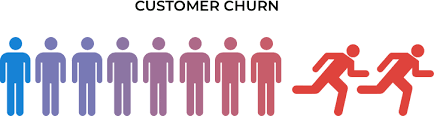

In [286]:
from IPython.display import Image
path = "/Users/BRI9999ADM/Documents/Working/SVI - 03rd March/Usecase 2/"
Image(filename = path + "logo.png", width=1000, height=1000)

*CONTEXT*

Pada bidang perbankan, Bank memperoleh pendapatan yang besar dari transaksi pinjaman. Tapi hal ini diiringi dengan risiko yang tinggi. Terkadang terdapat peminjam yang gagal bayar atau dapat disebut dengan default. Untuk mengatasi masalah ini, pihak bank menggunakan Machine Learning untuk memprediksi nasabah yang kira-kira akan default berdasarkan data masa lalu tentang pinjaman peminjam. 
Untuk tujuan itu, usecase yang akan dikerjakan terkait pengembangan model machine learning yang baik untuk mengklasifikasi peminjam baru yang cenderung gagal bayar atau tidak.


# Data Understanding

In [90]:
# Data & visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import BinaryEncoder
import category_encoders as ce

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from mrmr import mrmr_classif

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble._forest import RandomForestClassifier
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

import shap
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK

# Others
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")# Others
shap.initjs()

## *Exploratory Data Analysis (EDA)*

In [289]:
df = pd.read_csv('Loan_Default.csv')
display(df)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Insight:

- Tidak terdapat kesalahan pada tipe data fitur.
- Terdapat beberapa fitur yang memiliki missing value.

In [92]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [93]:
display(df.describe(include='object'))
obj_col = df.describe(include='object').columns

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,...,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,...,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637


In [94]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(1).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,148670,[67404]
1,year,int64,0,0.00,1,[2019]
2,loan_limit,object,3344,2.25,2,[cf]
3,Gender,object,0,0.00,4,[Sex Not Available]
4,approv_in_adv,object,908,0.61,2,[pre]
5,loan_type,object,0,0.00,3,[type2]
6,loan_purpose,object,134,0.09,4,[p4]
7,Credit_Worthiness,object,0,0.00,2,[l1]
8,open_credit,object,0,0.00,2,[opc]
9,business_or_commercial,object,0,0.00,2,[nob/c]


In [95]:
# Sex Not Available to NaN
df['Gender'].replace({'Sex Not Available':np.nan}, inplace=True)

### *Missing Value*

In [96]:
# Missing value in training data
percent_missing = round(df.isnull().sum()*100/len(df), 2)

# df train
missing_value = pd.DataFrame({'columns':df.columns,
                              'data type': df.dtypes,
                              'percent_missing':percent_missing})
missing_value = missing_value[missing_value['percent_missing']>0].sort_values('percent_missing', ascending=False).reset_index(drop=True)
display(missing_value)

,columns,data type,percent_missing
0,Upfront_charges,float64,26.66
1,Gender,object,25.33
2,Interest_rate_spread,float64,24.64
3,rate_of_interest,float64,24.51
4,dtir1,float64,16.22
5,property_value,float64,10.16
6,LTV,float64,10.16
7,income,float64,6.15
8,loan_limit,object,2.25
9,approv_in_adv,object,0.61


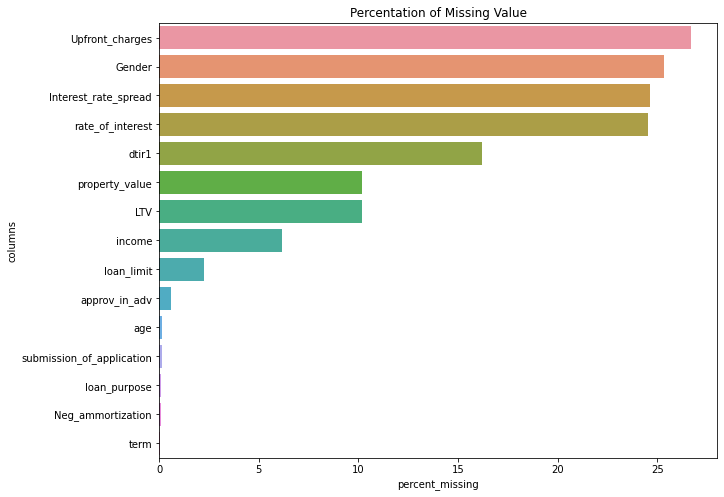

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(data=missing_value, x='percent_missing', y='columns')
plt.title('Percentation of Missing Value')
plt.show()

<AxesSubplot:>

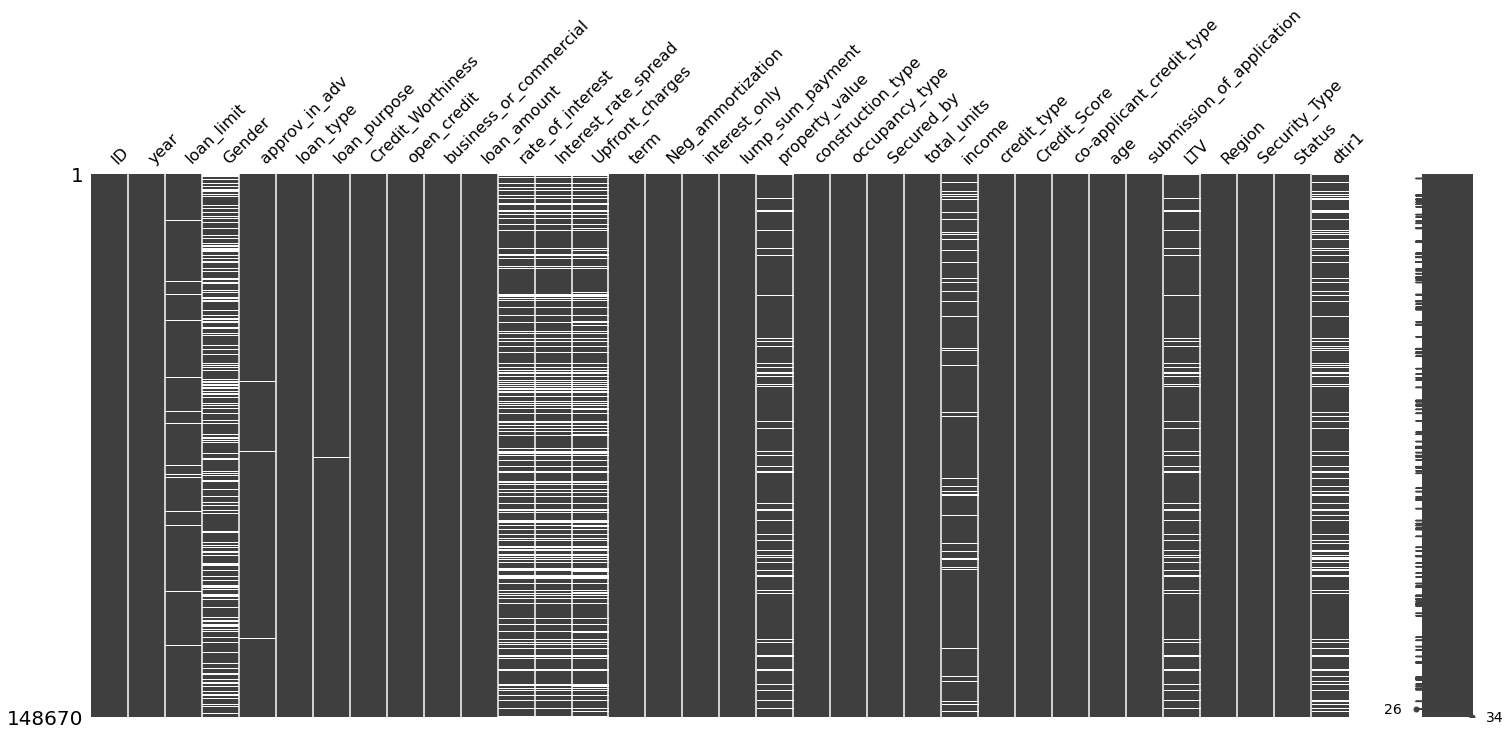

In [98]:
msno.matrix(df)

Insight:
    
- Jika dilihat pada fitur rate_of_interest, interest_rate_spread, dan upfront_charges memiliki pola missing value yang sama pada data.

### *Target Baseline*

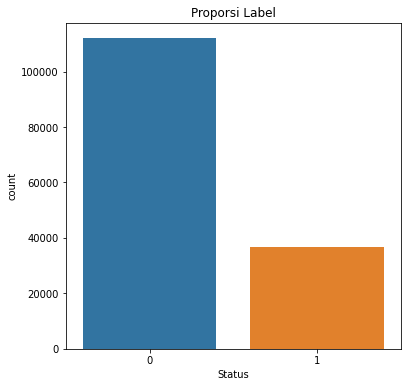

,Status,counts
0,0,112031
1,1,36639


In [99]:
plt.figure(figsize=(6,6))
sns.countplot(df['Status'])
plt.title('Proporsi Label')
plt.show()

# Table
df.groupby('Status').size().reset_index(name='counts')

*Insight:*

Berdasarkan data di atas, dapat ditarik kesimpulan bahwa target/label terindikasi imbalance atau tidak seimbang. Hal ini dapat membuat model cenderung untuk memprediksi kelas mayoritas. Maka hal ini akan dilakukan imbalanced handling menggunakan undersampling atau oversampling.

### *Feature Distribution*

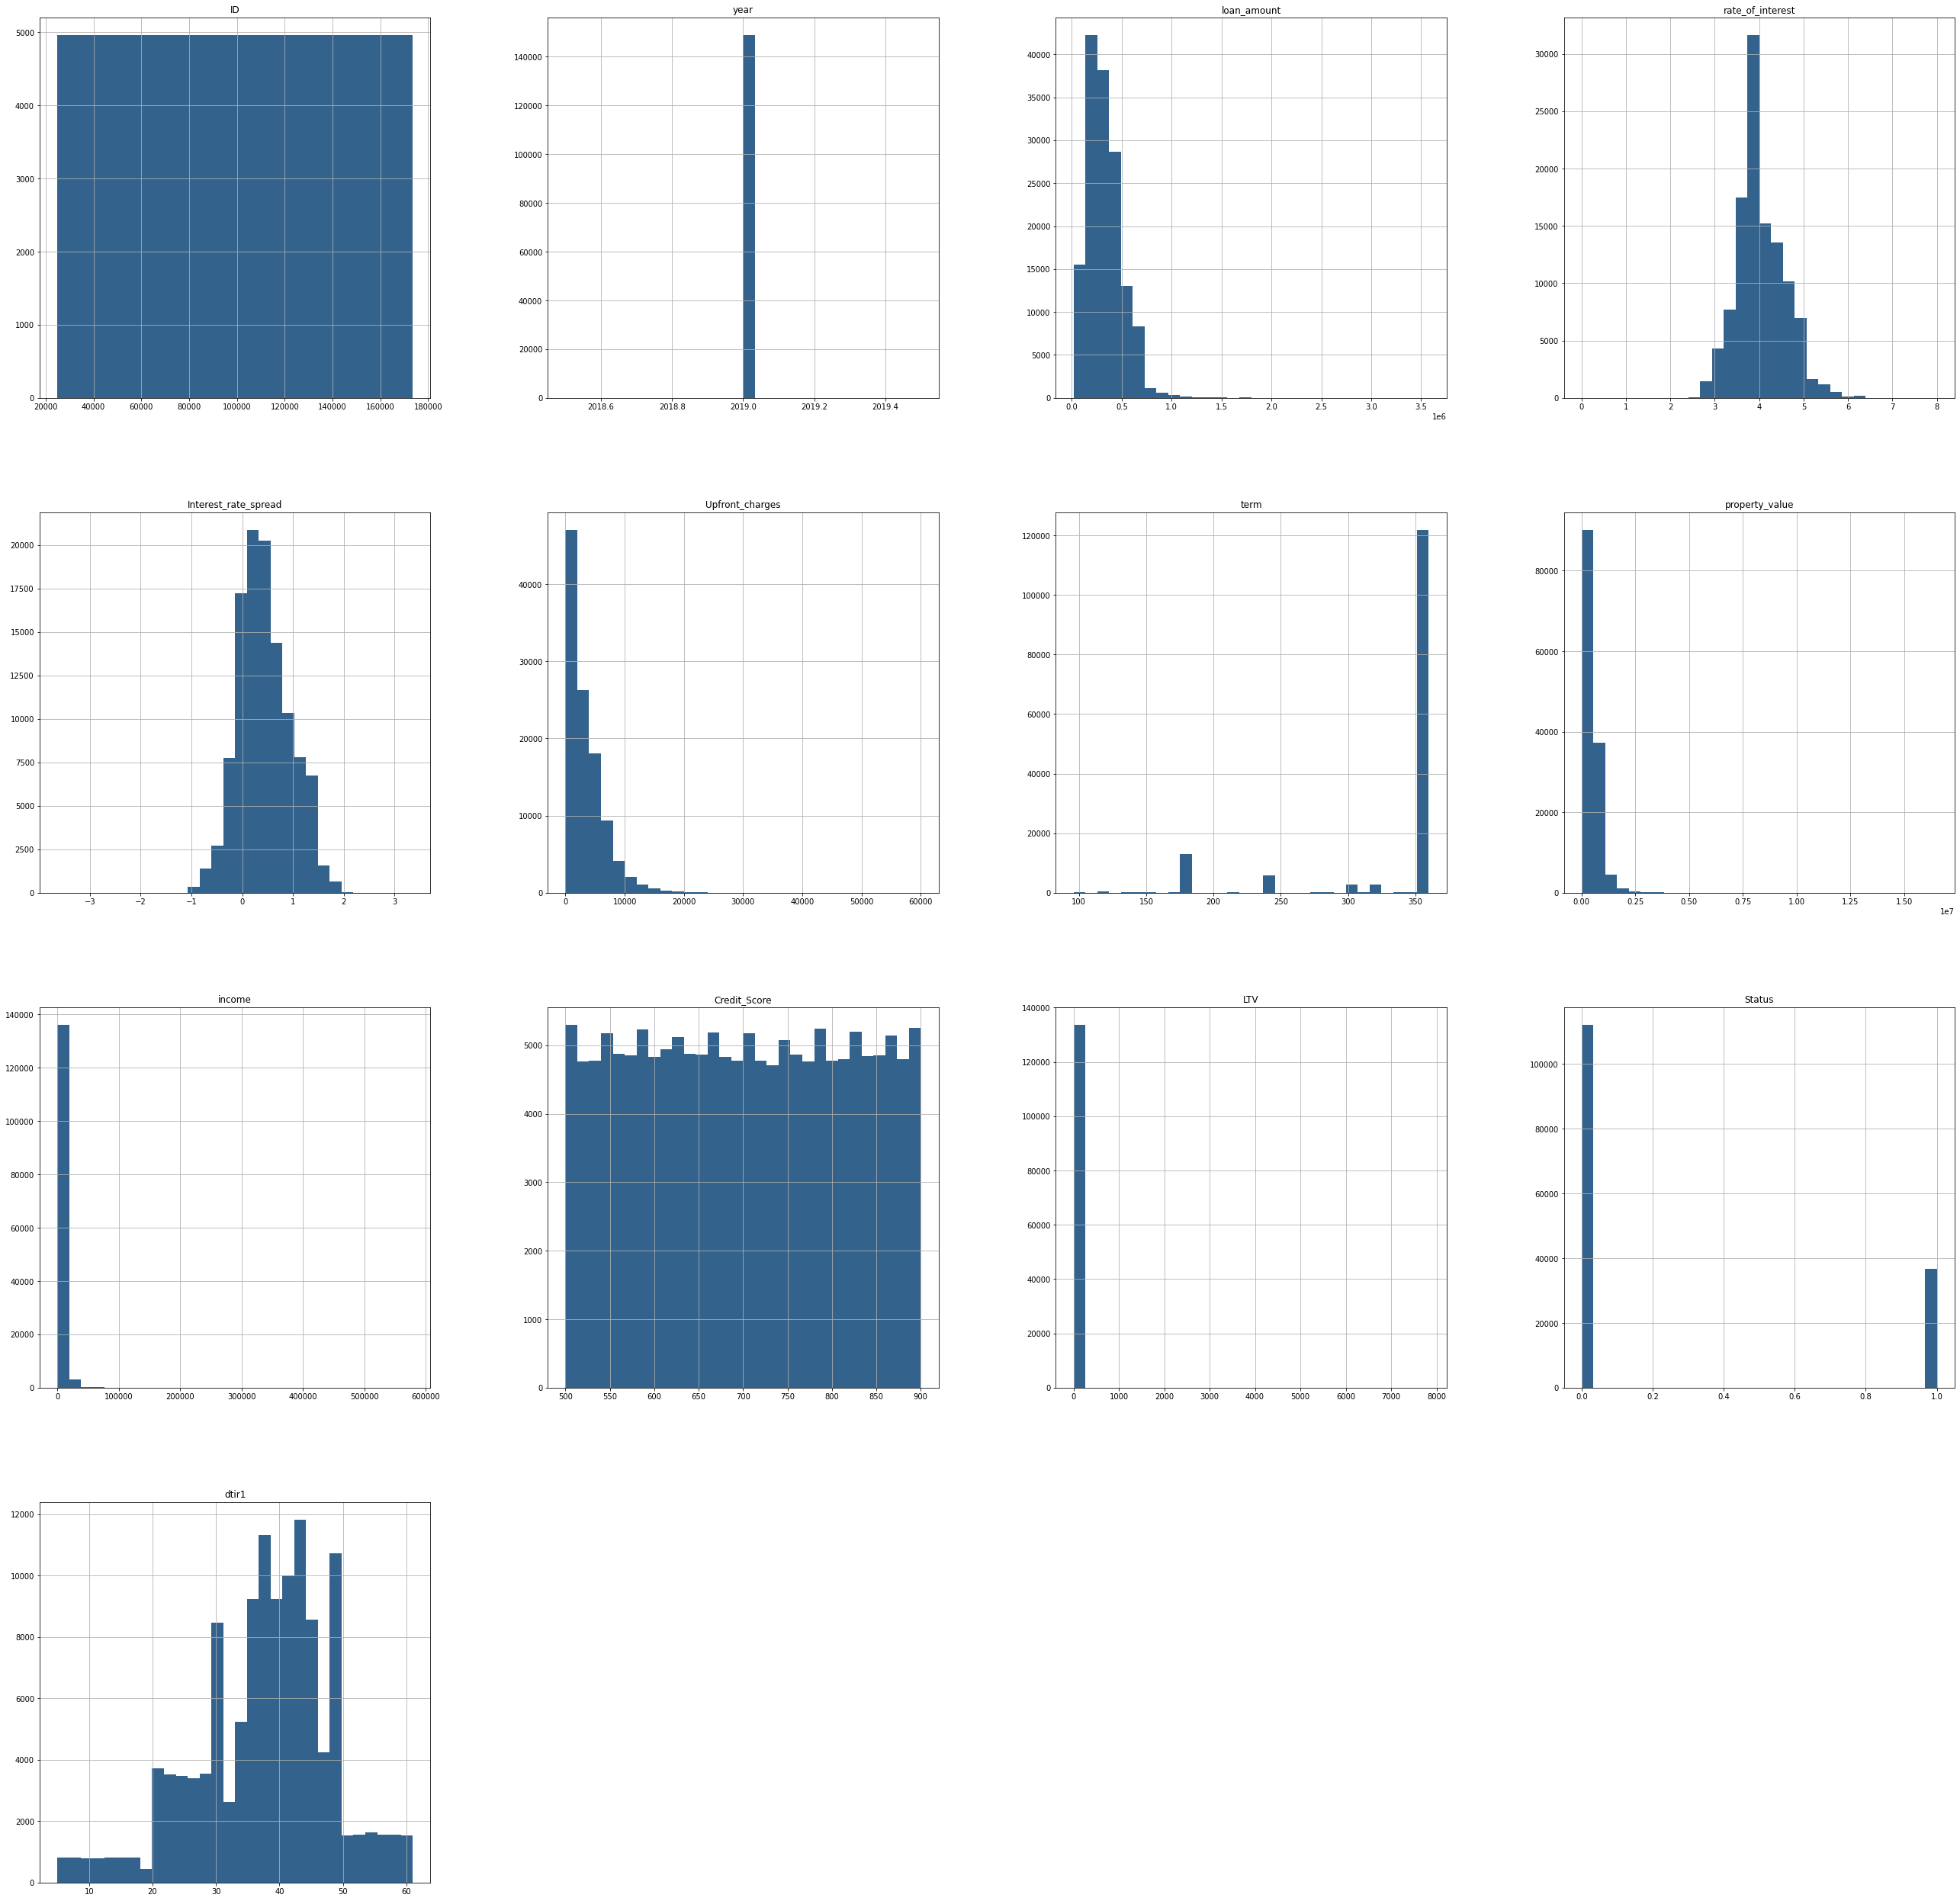

In [100]:
df.hist(figsize=(45,45), bins=30, color = '#33638D')
plt.show()

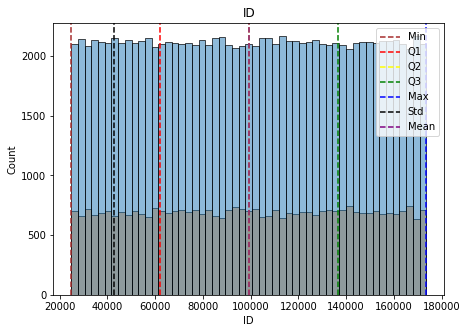

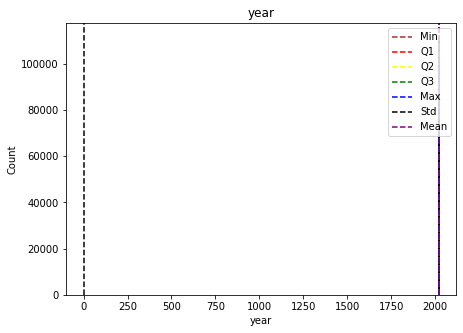

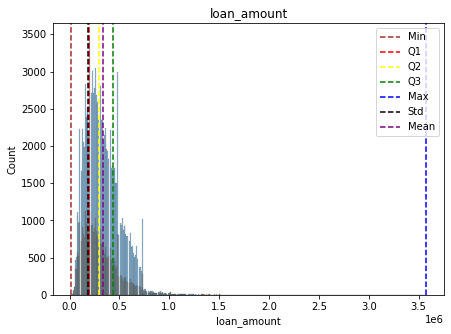

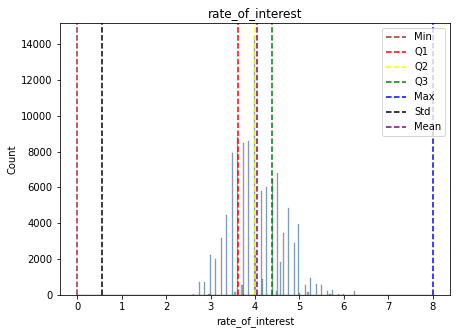

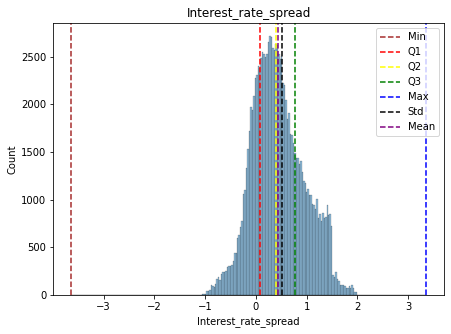

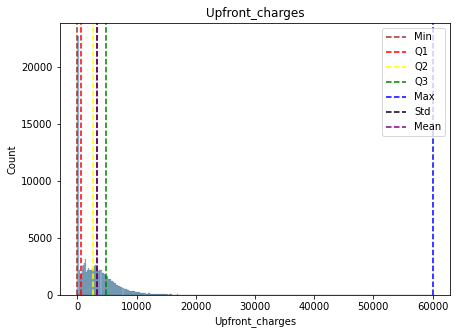

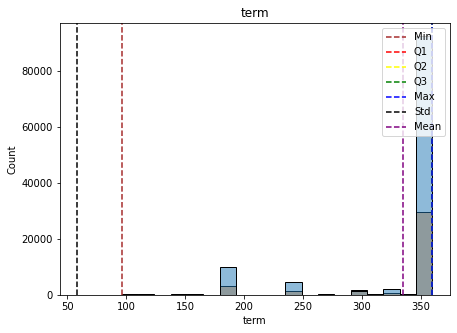

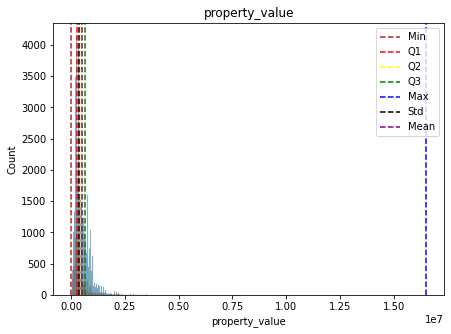

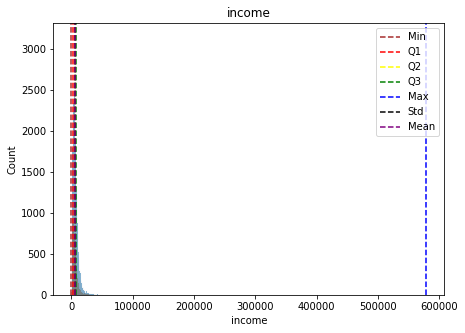

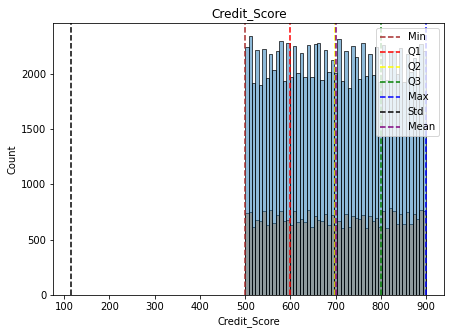

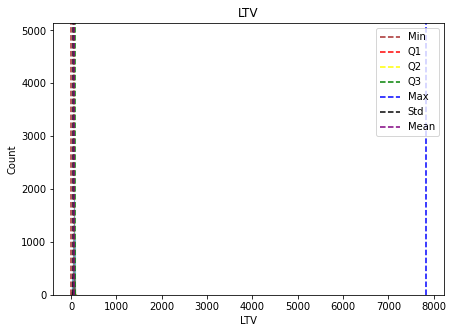

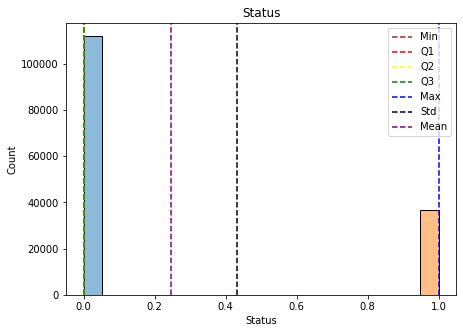

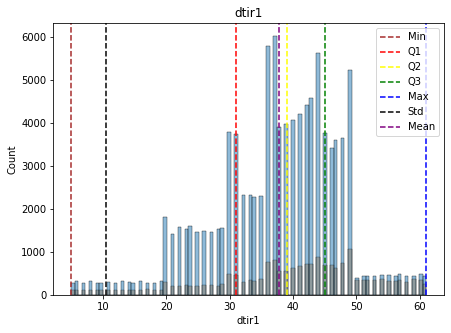

In [101]:
# Numerical
for col in df.describe(include='number').columns.tolist():
    plt.figure(figsize=(7,5))
    sns.histplot(data=df, x=col, hue='Status')
    
    plt.axvline(x=df[col].min(), ls='--', c='Brown', label='Min')
    plt.axvline(x=df[col].quantile(0.25), ls='--', c='red', label='Q1')
    plt.axvline(x=df[col].quantile(0.5), ls='--', c='yellow', label='Q2')
    plt.axvline(x=df[col].quantile(0.75), ls='--', c='green', label='Q3')
    plt.axvline(x=df[col].max(), ls='--', c='Blue', label='Max')
    plt.axvline(x=df[col].std(), ls='--', c='Black', label='Std')
    plt.axvline(x=df[col].mean(), ls='--', c='Purple', label='Mean')
    
    plt.title(col)
    plt.legend(loc=1)
    plt.show()

Insight:

- fitur yang memiliki distribusi normal adalah rate_of_interest, dan interest_rate_spread.
- fitur loan_amount, upfront_charges, property_value, dan income memiliki distribusi *long tail*.

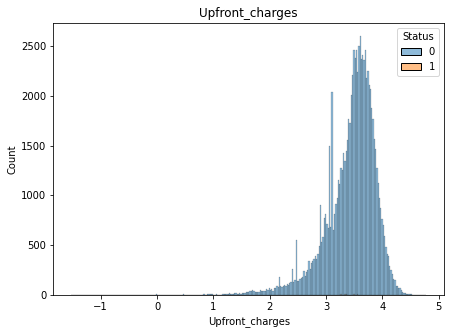

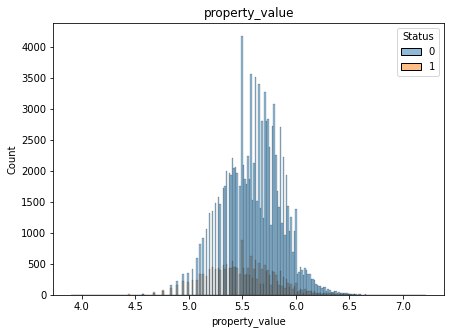

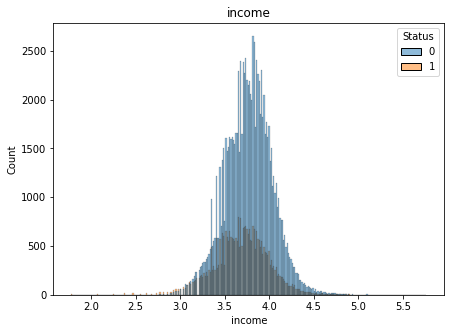

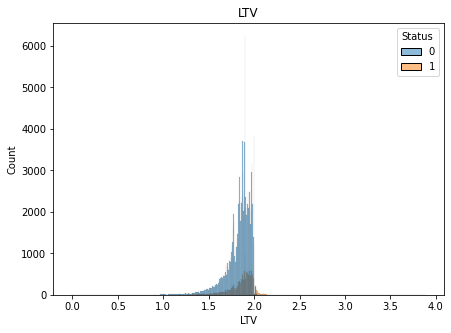

In [102]:
call = ['Upfront_charges', 'property_value', 'income', 'LTV']

df_log = pd.DataFrame()
for col in call:
    df_log[col] = np.log10(df[col])
df_log['Status'] = df['Status']
df_log
    
for col in call:
    plt.figure(figsize=(7,5))
    sns.histplot(data=df_log, x=col, hue='Status')
    
    plt.title(col)
    plt.show()

Insight:

- Setelah dilakukan plot distribusi dengan skema log scale, fitur property_value dan income memiliki distribusi normal.
- Sedangkan LTV dan upfront_charges memiliki distribusi long tail dan masing-masing memiliki outlier.
- Kecenderungan nasabah untuk tidak default semakin tinggi berbanding lurus dengan semakin tingginya fitur property_value.
- Nasabah yang memiliki LTV lebih dari 2 pada plot di atas memiliki kecenderungan untuk default.

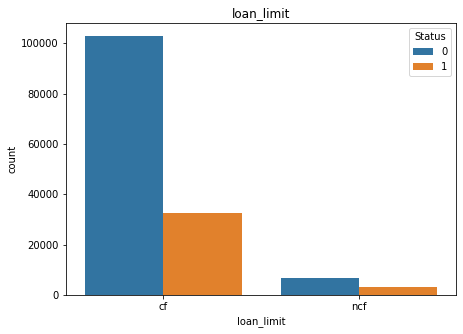

,cf,ncf
Normal (0),102904,6664
Default (1),32444,3314


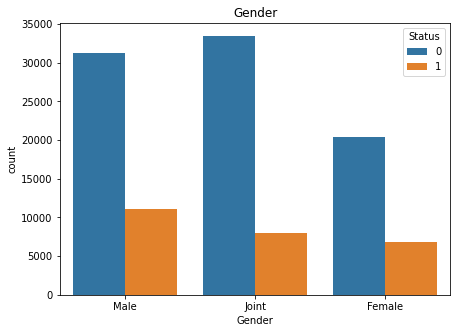

,Male,Joint,Female
Normal (0),31255,33466,20418
Default (1),11091,7933,6848


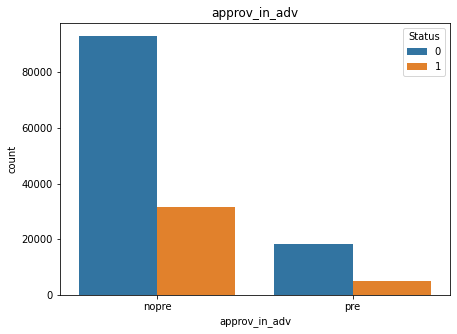

,nopre,pre
Normal (0),93058,18306
Default (1),31563,4835


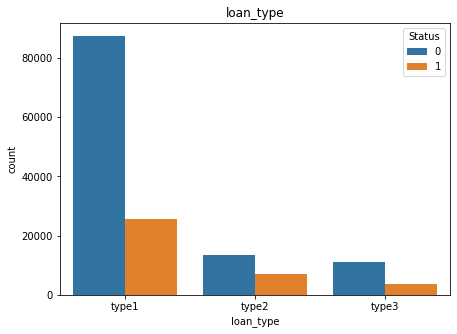

,type1,type2,type3
Normal (0),87398,13590,11043
Default (1),25775,7172,3692


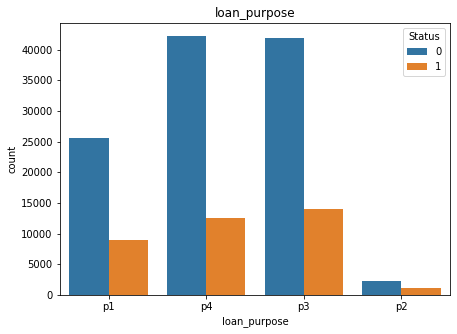

,p1,p4,p3,p2
Normal (0),25594,42209,41938,2191
Default (1),8935,12590,13996,1083


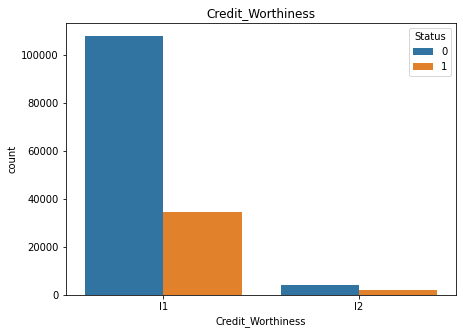

,l1,l2
Normal (0),107715,4316
Default (1),34629,2010


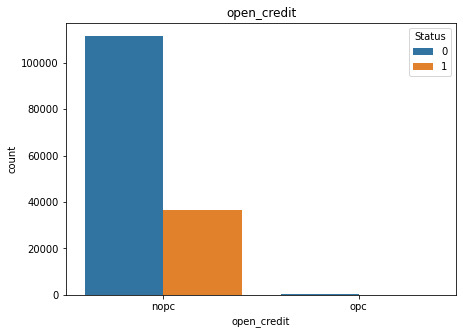

,nopc,opc
Normal (0),111573,458
Default (1),36541,98


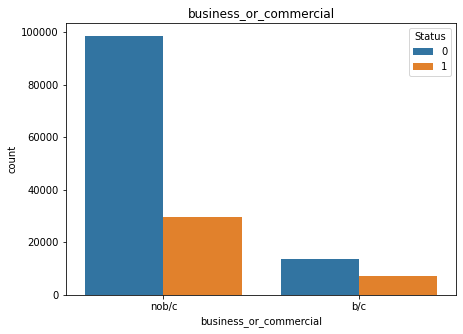

,nob/c,b/c
Normal (0),98441,13590
Default (1),29467,7172


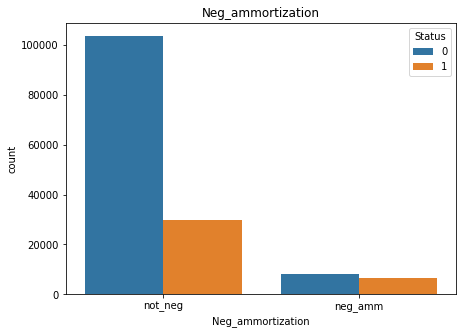

,not_neg,neg_amm
Normal (0),103560,8382
Default (1),29860,6747


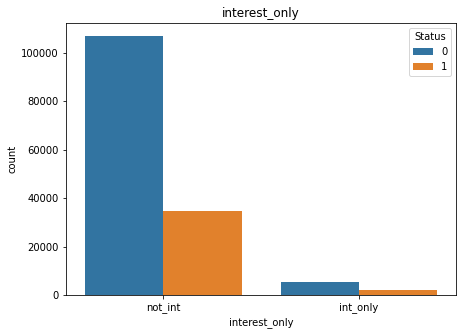

,not_int,int_only
Normal (0),106863,5168
Default (1),34697,1942


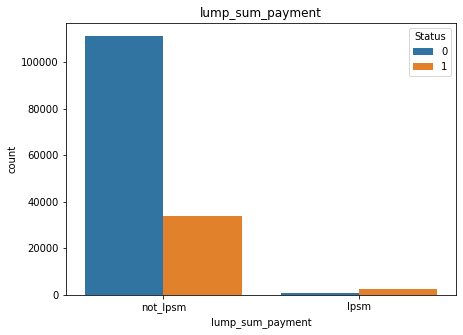

,not_lpsm,lpsm
Normal (0),111275,756
Default (1),34011,2628


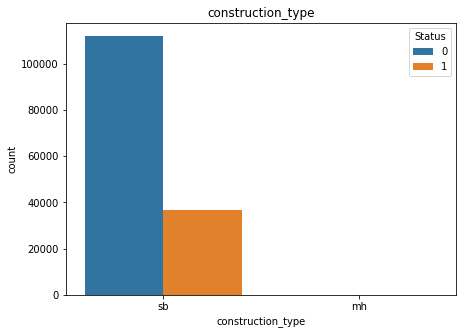

,sb,mh
Normal (0),112031,0
Default (1),36606,33


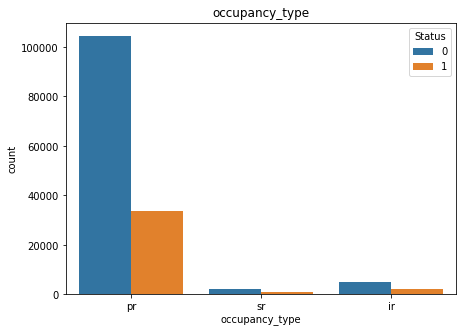

,pr,sr,ir
Normal (0),104612,2280,5139
Default (1),33589,849,2201


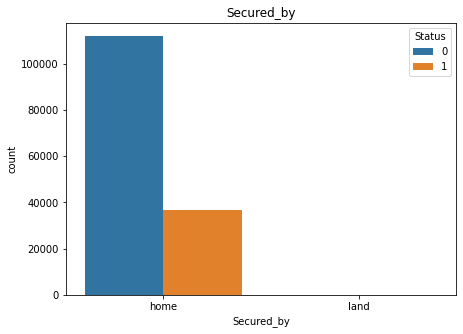

,home,land
Normal (0),112031,0
Default (1),36606,33


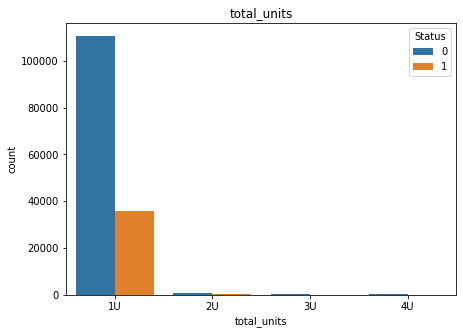

,1U,2U,3U,4U
Normal (0),110597,967,242,225
Default (1),35883,510,151,95


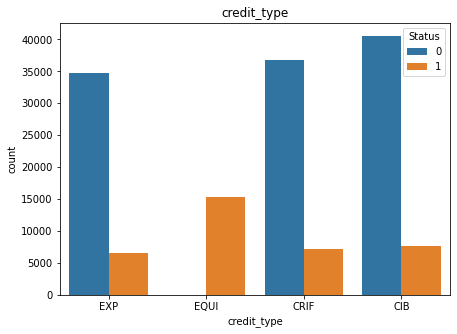

,EXP,EQUI,CRIF,CIB
Normal (0),34714,1,36774,40542
Default (1),6605,15297,7127,7610


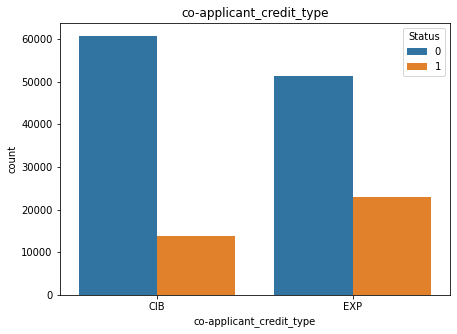

,CIB,EXP
Normal (0),60679,51352
Default (1),13713,22926


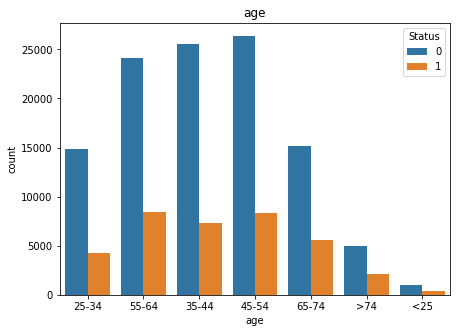

,25-34,55-64,35-44,45-54,65-74,>74,<25
Normal (0),14894,24112,25509,26371,15173,5022,950
Default (1),4248,8422,7309,8349,5571,2153,387


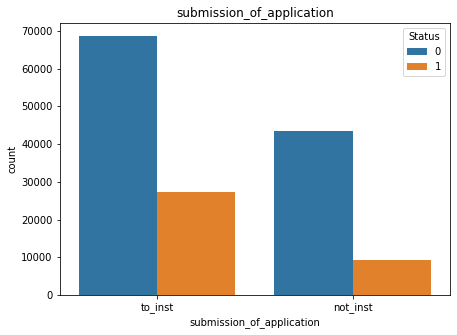

,to_inst,not_inst
Normal (0),68601,43430
Default (1),27213,9226


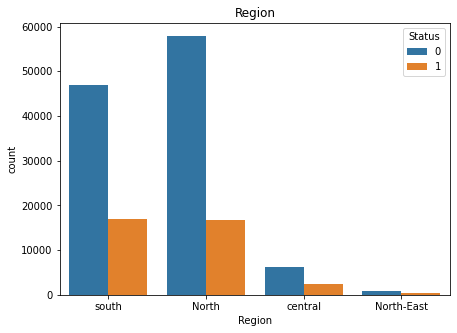

,south,North,central,North-East
Normal (0),46969,57901,6302,859
Default (1),17047,16821,2395,376


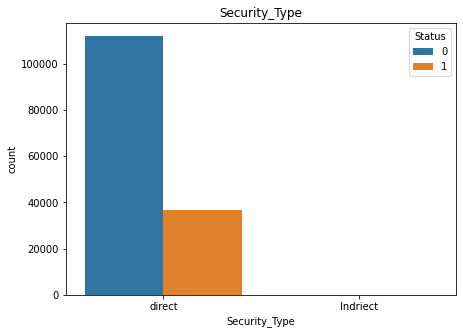

,direct,Indriect
Normal (0),112031,0
Default (1),36606,33


In [103]:
# Function
def table_other(dff, xLab, columnn):
    _label = dff[dff[columnn].notnull()][columnn].unique()
    _label
    
    default = [ len(dff[(dff[columnn] == i) & (dff['Status'] == 0) ] ) for i in _label ]
    normal = [ len(dff[(dff[columnn] == i) & (dff['Status'] == 1) ] ) for i in _label ]

    tabel = pd.DataFrame(data=[default, normal],
                         index=['Normal (0)', 'Default (1)'],
                         columns=xLab)

    display(tabel)

# Categorical
for col in df.describe(exclude='number').columns.tolist():
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=col, hue='Status')
    plt.title(col)
    plt.show()
    
    labell = df[df[col].notnull()][col].unique()
    table_other(df, labell, col)
    
    print('\n\n')

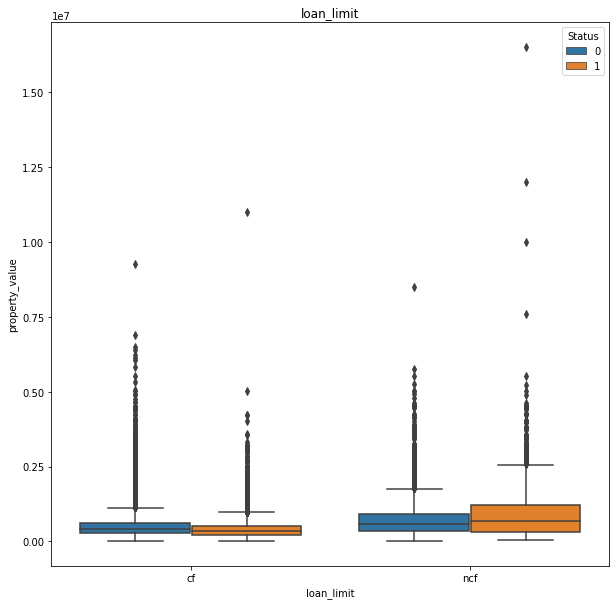

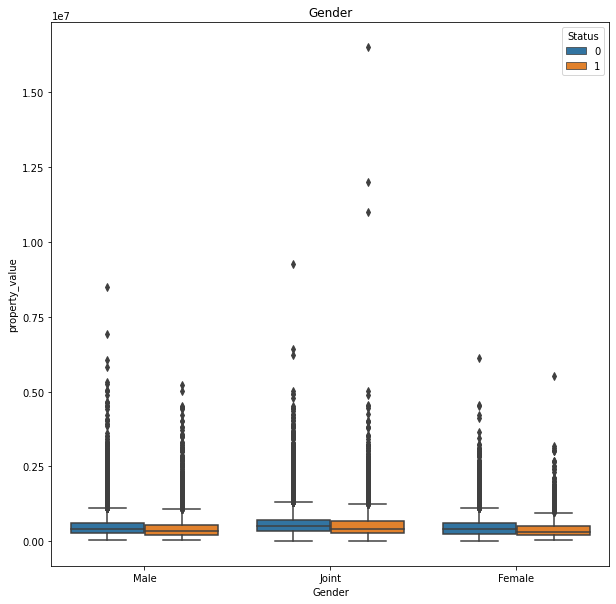

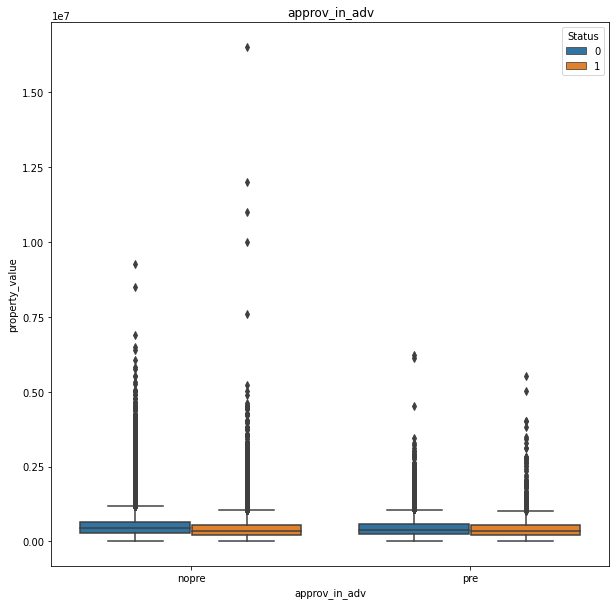

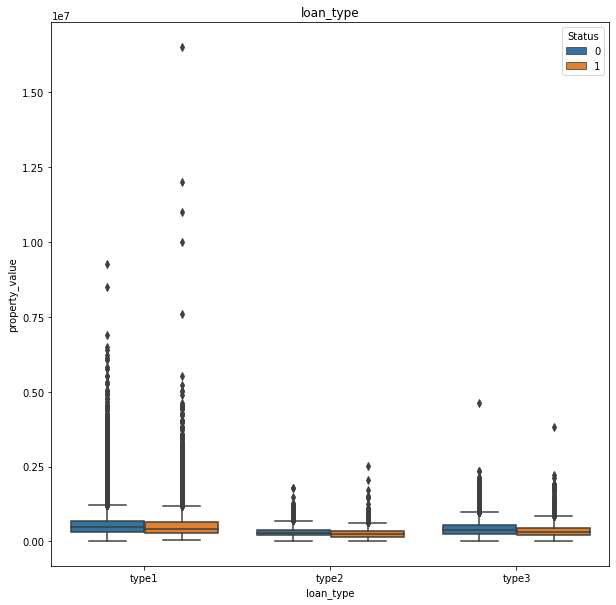

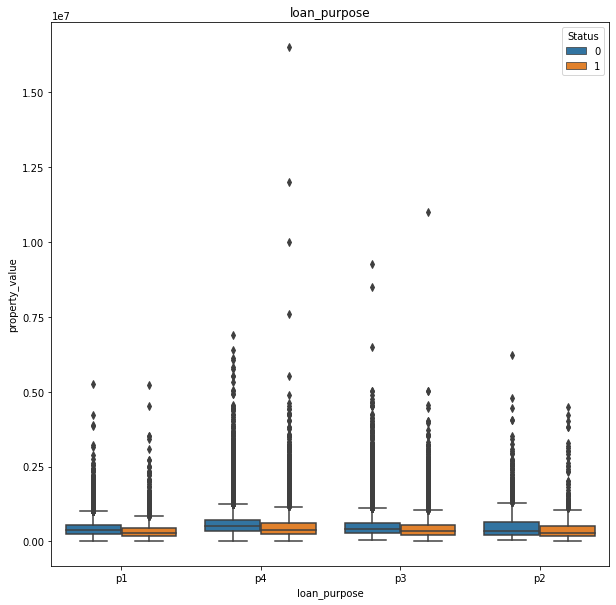

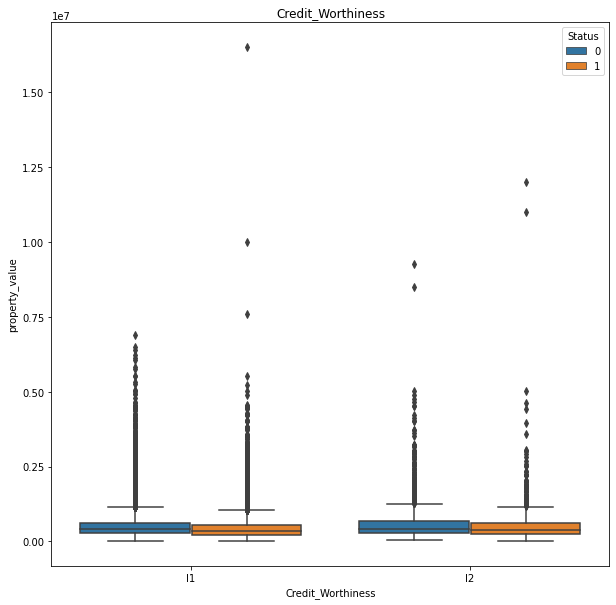

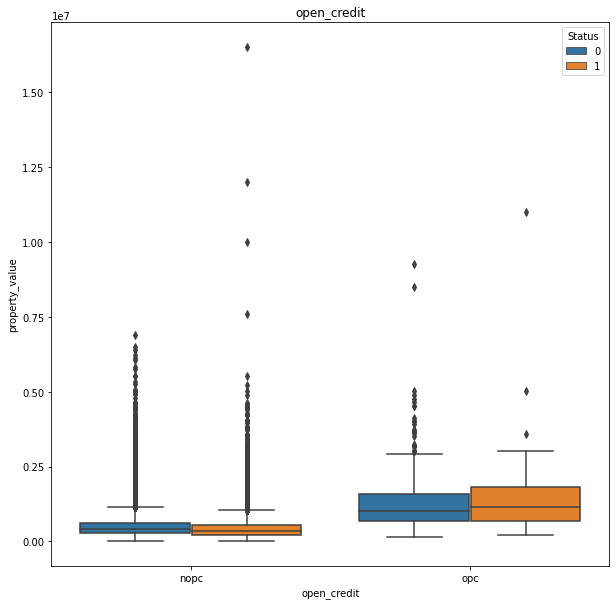

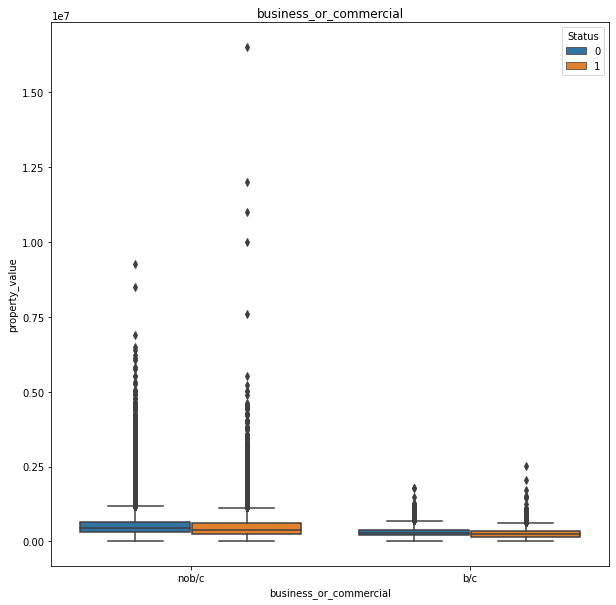

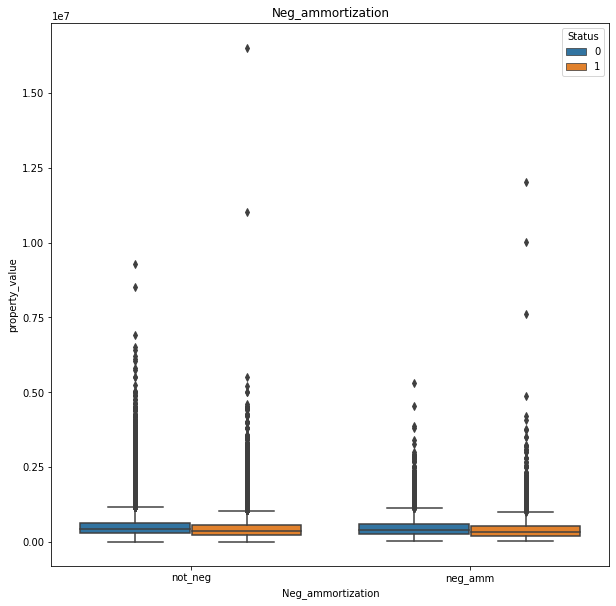

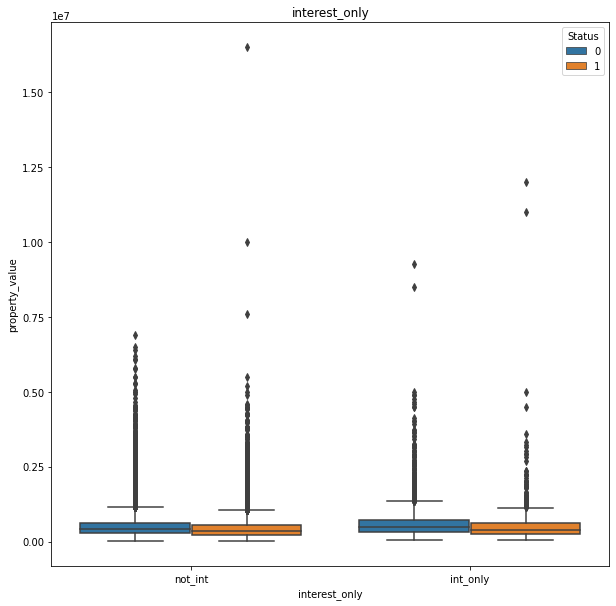

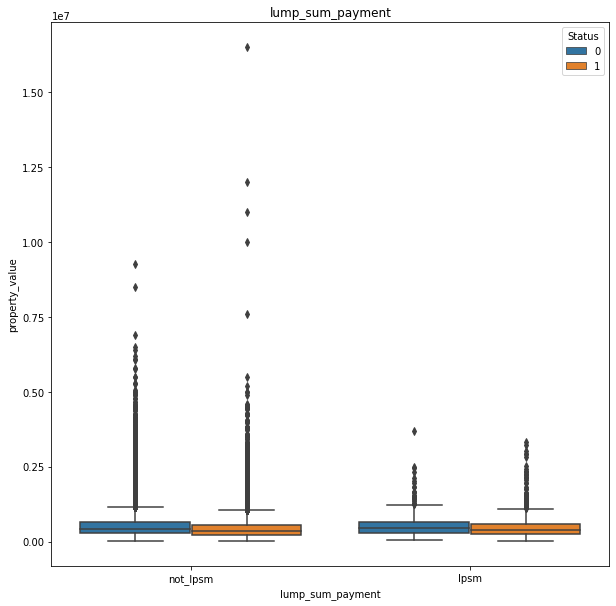

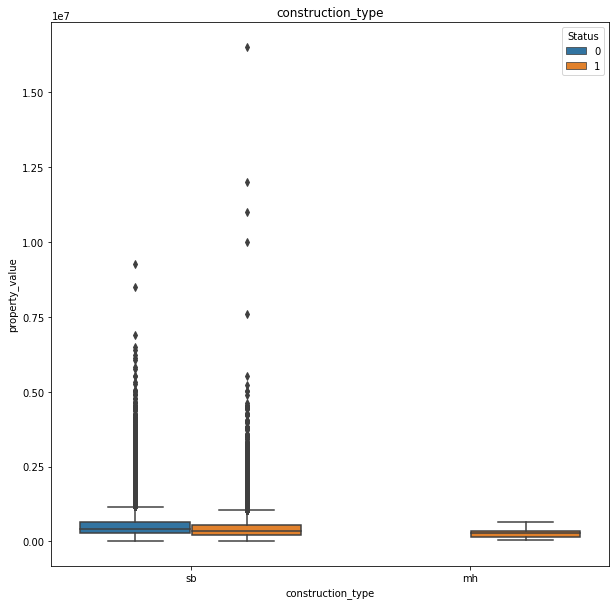

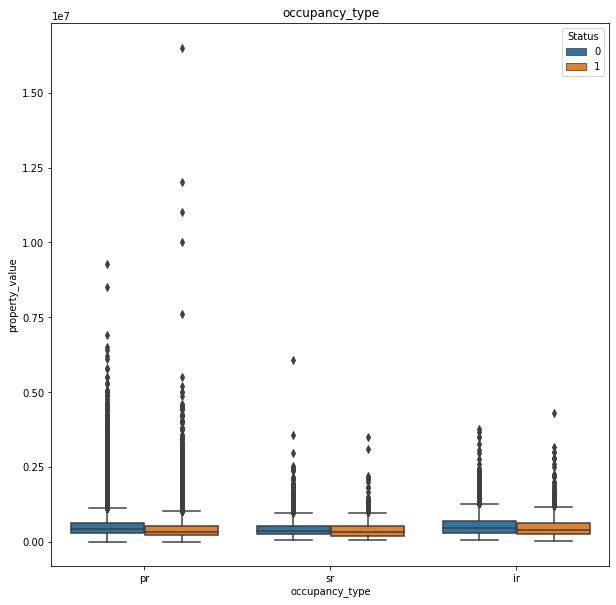

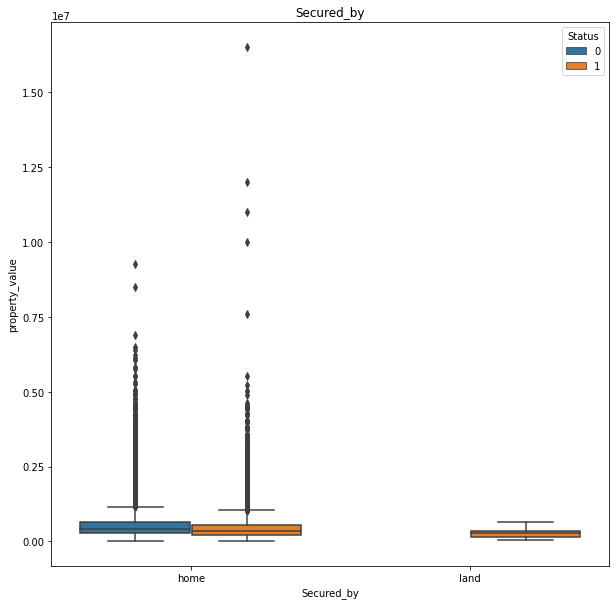

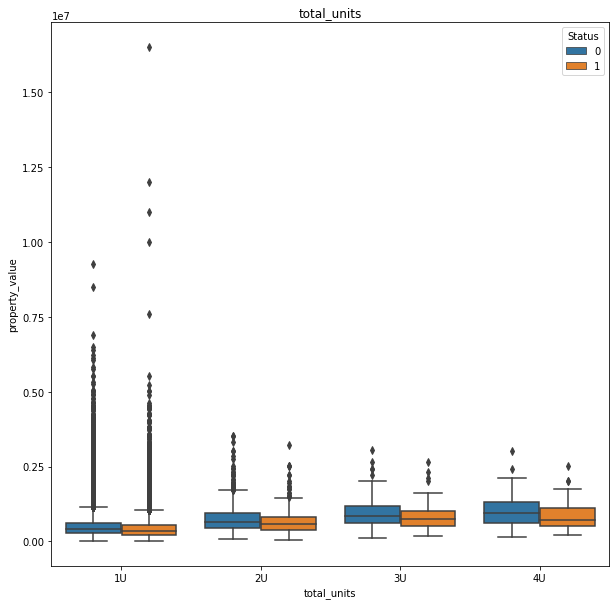

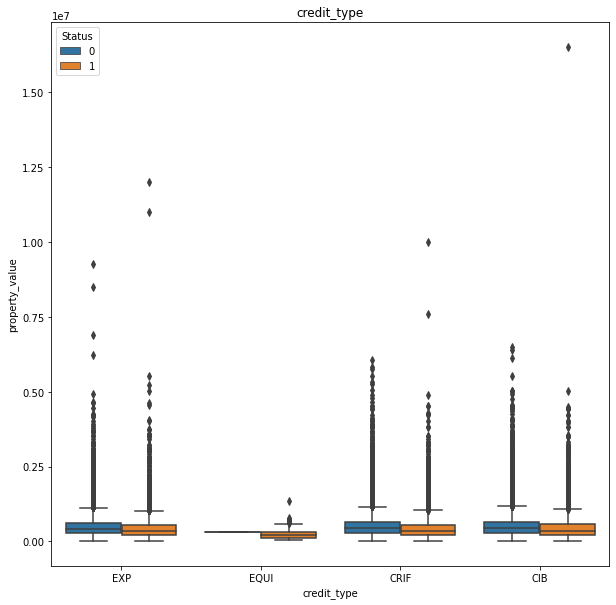

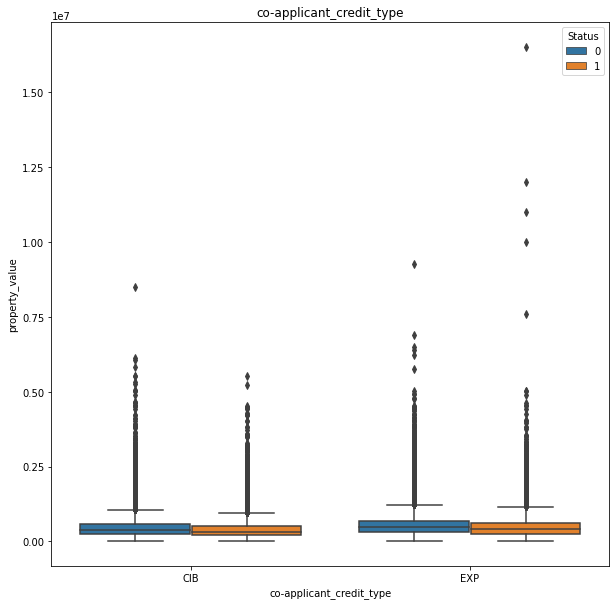

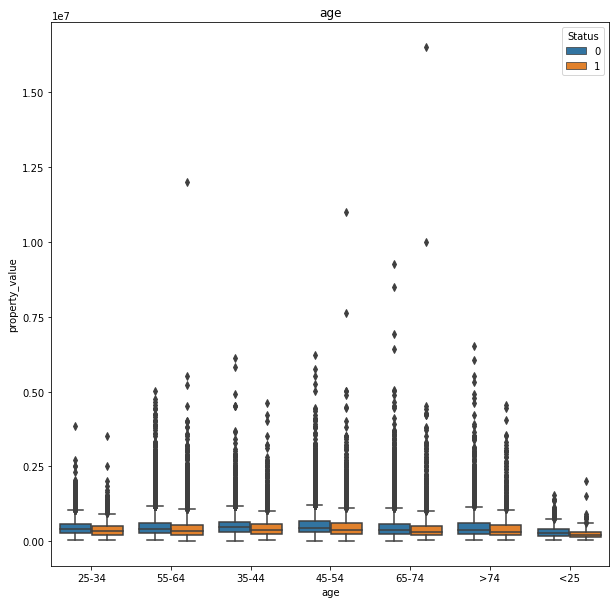

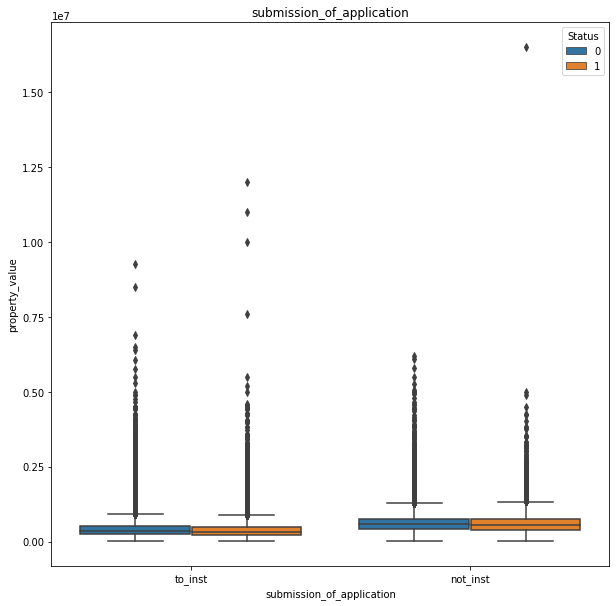

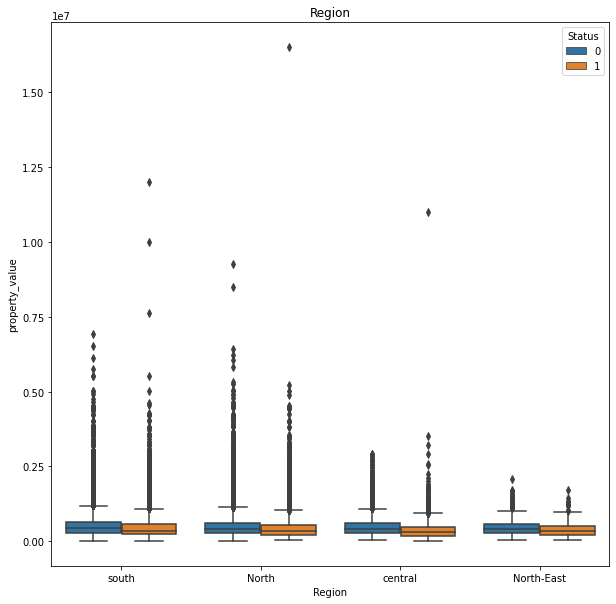

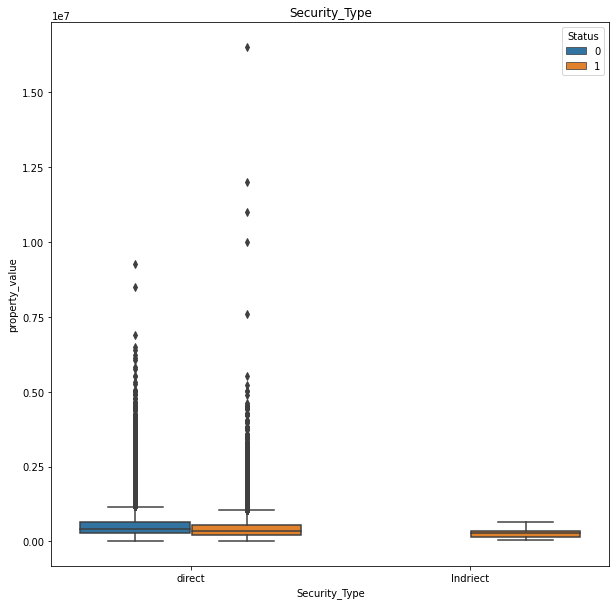

In [104]:
# Categorical feature based on property value
for col in df.describe(exclude='number').columns.tolist():
#     print(col)
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df, x=col, y='property_value', hue='Status')
    plt.title(col)
    plt.show()

In [288]:
display(df[df['construction_type'] == 'mh']['Status'].value_counts())
display(df[df['Secured_by'] == 'land']['Status'].value_counts())

1    33
Name: Status, dtype: int64

1    33
Name: Status, dtype: int64

Insight:
    
- Pada fitur *construction_type dan secured_by*, nasabah yang memiliki kategori *mh dan land* secara keseluruhan dikategorikan sebagai nasabah yang akan default. Fitur ini dapat menjadi fitur yang baik untuk menjadi perbaikan.

### *Spearman Correlation*

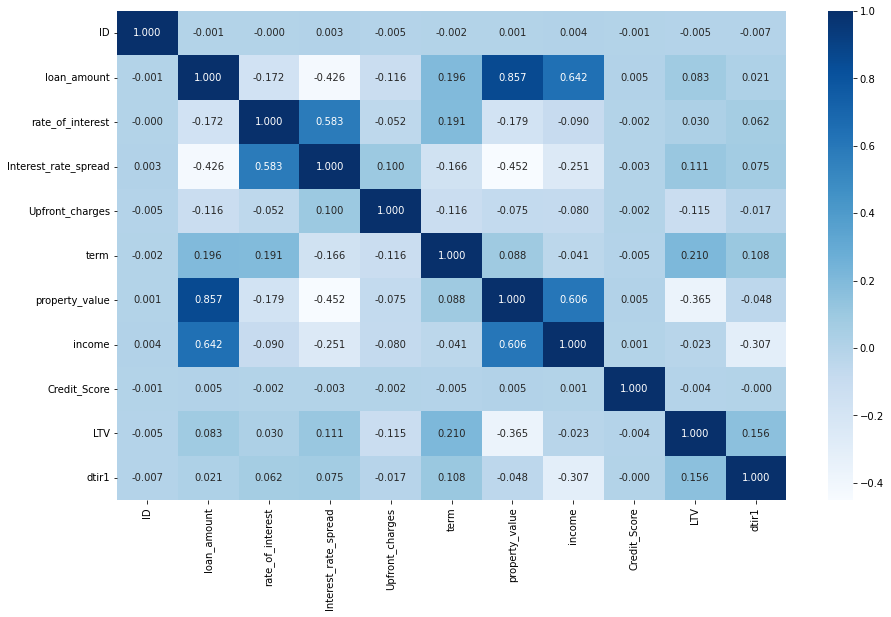

In [130]:
plt.figure(figsize=(15,9))
sns.heatmap(data=df.drop(columns=['Status', 'year']).corr(method='spearman'), annot=True, fmt='.3f', cmap='Blues')
plt.show()

# Data Preparation

### ***Data Splitting***

In [230]:
df_new = df.copy()
df_new.drop(['year', 'ID'], axis=1, inplace=True)

X = df_new.drop(['Status'], axis=1)
y = df_new['Status']

# Normal data
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,  
                                                  stratify=y,
                                                  test_size = 0.2,
                                                  random_state = 2022)

# Undersampling data with Random Under Sampling
under_sampling = RandomUnderSampler(sampling_strategy='majority')
X_train_us, y_train_us = under_sampling.fit_resample(X_train, y_train)

# Oversampling data with Random Over Sampling
over_sampling = RandomOverSampler(random_state=42)
X_train_os, y_train_os = over_sampling.fit_resample(X_train, y_train)

### ***Column Transformer***

In [169]:
for col in df_new.describe(include='O').columns:
    print(f'Total unique value of {col} is {df_new[col].nunique()}')

Total unique value of loan_limit is 2
Total unique value of Gender is 3
Total unique value of approv_in_adv is 2
Total unique value of loan_type is 3
Total unique value of loan_purpose is 4
Total unique value of Credit_Worthiness is 2
Total unique value of open_credit is 2
Total unique value of business_or_commercial is 2
Total unique value of Neg_ammortization is 2
Total unique value of interest_only is 2
Total unique value of lump_sum_payment is 2
Total unique value of construction_type is 2
Total unique value of occupancy_type is 3
Total unique value of Secured_by is 2
Total unique value of total_units is 4
Total unique value of credit_type is 4
Total unique value of co-applicant_credit_type is 2
Total unique value of age is 7
Total unique value of submission_of_application is 2
Total unique value of Region is 4
Total unique value of Security_Type is 2


**Treatment for categorical featured is based on unique value.**

- Binary encoding: age

- One Hot Encoding: Others

In [242]:
# Features
miss_numerical_feature = missing_value[missing_value['data type'] == 'float64']['columns'].tolist()
miss_oht_categorical_feature = ['Gender', 'loan_limit', 'approv_in_adv', 'submission_of_application', 'loan_purpose', 'Neg_ammortization']
miss_bin_categorical_feature = ['age']
only_oht_categorical_feature = [i for i in df_new.describe(include='O').columns.values.tolist() if i not in (miss_oht_categorical_feature + miss_bin_categorical_feature)]
other_features = [i for i in df_new.drop(columns=['Status']) if i not in (miss_numerical_feature+miss_oht_categorical_feature+miss_bin_categorical_feature+only_oht_categorical_feature)]

# Imputer
knn_3 = KNNImputer(n_neighbors=3)
categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Encoding
one_hot_enc = OneHotEncoder(drop='first')
binary_enc = ce.BinaryEncoder()

# ColumnTransformer
miss_bin_pipeline = Pipeline([
    ('cat_imputer', categorical_imputer),
    ('binary_cat', binary_enc),
])

miss_oht_pipeline = Pipeline([
    ('cat_imputer', categorical_imputer),
    ('one_hot_cat', one_hot_enc),
])

oht_pipeline = Pipeline([
    ('one_hot_cat', one_hot_enc),
])

transformer_pipeline = ColumnTransformer([
    ('binary_encoding', miss_bin_pipeline, miss_bin_categorical_feature),
    ('one_hot_encoding', miss_oht_pipeline, miss_oht_categorical_feature),
    ('only_one_hot_encoding', oht_pipeline, only_oht_categorical_feature),
    ('numeric_miss', knn_3, miss_numerical_feature),
], remainder='passthrough')

display(transformer_pipeline)

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary_encoding',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary_cat',
                                                  BinaryEncoder())]),
                                 ['age']),
                                ('one_hot_encoding',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_cat',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'loan_limit',...
                                  'open_credit', 'business_or_commercial',
                                  'interest_only', 'lump_sum_payment',
                                  'construction_type', 'occupancy_type',
                                  'Secured_by', 'total_units', 'credit_type',
                                  'co-applicant_credit_type', 'Region',
                                  'Security_Type']),
                                ('numeric_miss', KNNImputer(n_neighbors=3),
                                 ['Upfront_charges', 'Interest_rate_spread',
                                  'rate_of_interest', 'dtir1', 'property_value',
                                  'LTV', 'income', 'term'])])

# Modelling & Evaluation

### *Benchmarking Testing*

In [245]:
xgb = XGBClassifier()
lgb = LGBMClassifier()

In [246]:
# Cross Validation
def cross_val_test(transform, X_train, y_train, models, models_name):
    score_cv_auc = []
    score_mean_auc = []
    score_std_auc = []
    score_test_auc = []
    
    for i in range(len(X_train)):
        for model in models:
            estimator = Pipeline([
                ('preprocessing', transform),
                ('model', model)
            ])
            
            # Fitting
            cv_auc = cross_val_score(estimator,
                                     X_train[i],
                                     y_train[i],
                                     cv
                                     = StratifiedKFold(n_splits=5),
                                     scoring = 'roc_auc')

            score_cv_auc.append(cv_auc.round(3))
            score_mean_auc.append(cv_auc.mean())
            score_std_auc.append(cv_auc.std())

            estimator.fit(X_train[i], y_train[i])

            test_auc = roc_auc_score(y_val,
                                     estimator.predict(X_val))
            score_test_auc.append(test_auc)
     
    summary = pd.DataFrame({
        'Model': models_name,
        'CV_AUC' : score_cv_auc,
        'Mean_AUC': score_mean_auc,
        'Std_AUC': score_std_auc,
        'score_test_AUC' : score_test_auc,
    })
    
    return summary

#### *Unsampling Data*

In [247]:
models = [xgb, lgb]
models_name = ['XGBoost', 'LightGBM']

df_benchmarking = cross_val_test(transformer_pipeline, 
                                 [X_train], 
                                 [y_train], 
                                 models, 
                                 models_name)
df_benchmarking

,Model,CV_AUC,Mean_AUC,Std_AUC,score_test_AUC
0,XGBoost,"[0.998, 0.998, 0.999, 0.998, 0.998]",0.998305,0.000209,0.979018
1,LightGBM,"[0.998, 0.997, 0.998, 0.997, 0.997]",0.997638,0.000235,0.971110


Berdasarkan skor cross-validation dan skor testing pada tabel di atas, kita dapat mengasumsikan beberapa pernyataan di bawah ini.

- 

#### *Comparison of Sampling Data*

In [248]:
models = [xgb]
models_name = ['XGBoost With Unsampling Data', 'XGBoost With Random Under Sampling Data', 'XGBoost With Random Over Sampling Data']

df_benchmarking_sampler = cross_val_test(transformer_pipeline, 
                                         [X_train, X_train_us, X_train_os], 
                                         [y_train, y_train_us, y_train_os], 
                                         models, 
                                         models_name)

df_benchmarking_sampler

,Model,CV_AUC,Mean_AUC,Std_AUC,score_test_AUC
0,XGBoost With Unsampling Data,"[0.998, 0.998, 0.999, 0.998, 0.998]",0.998305,0.000209,0.979018
1,XGBoost With Random Under Sampling Data,"[0.998, 0.998, 0.998, 0.998, 0.998]",0.997941,0.000116,0.982704
2,XGBoost With Random Over Sampling Data,"[0.999, 0.999, 0.999, 0.999, 0.999]",0.999255,0.000071,0.981843


Insight:
    
- Model XGBoost dengan Random Under Sampling memiliki skor AUC tertinggi pada data testing  yaitu 98.3%.

#### *Feature Selection With VIF*

In [264]:
# Fit
df_tr = transformer_pipeline.fit_transform(X_train_us)
df_te = transformer_pipeline.transform(X_val)

In [265]:
features_name = transformer_pipeline.transformers_[0][1]['binary_cat'].get_feature_names()+\
                transformer_pipeline.transformers_[1][1]['one_hot_cat'].get_feature_names().tolist()+\
                transformer_pipeline.transformers_[2][1]['one_hot_cat'].get_feature_names().tolist()+\
                miss_numerical_feature + \
                other_features

test_df_train = pd.DataFrame(df_tr, columns=features_name)
test_df_test = pd.DataFrame(df_te, columns=features_name)

display(test_df_train)
display(test_df_test)

,0_0,0_1,0_2,x0_Joint,x0_Male,x1_ncf,x2_pre,x3_to_inst,x4_p2,x4_p3,...,Upfront_charges,Interest_rate_spread,rate_of_interest,dtir1,property_value,LTV,income,term,loan_amount,Credit_Score
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.378800,3.990000,38.000000,568000.000000,94.454225,6480.0,360.0,536500.0,736.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,4021.750000,0.479200,4.750000,49.000000,498000.000000,79.618474,5220.0,360.0,396500.0,809.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2417.880000,0.569700,3.875000,24.000000,328000.000000,93.445122,7320.0,324.0,306500.0,557.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.000000,0.619600,4.500000,25.000000,478000.000000,95.502092,12780.0,360.0,456500.0,586.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,-0.100400,3.625000,44.666667,228000.000000,59.868421,112840.0,360.0,136500.0,863.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58617,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.657300,3.791667,43.000000,521333.333333,83.587733,3780.0,360.0,166500.0,826.0
58618,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,2625.383333,0.013500,3.371667,29.000000,558000.000000,24.462366,7620.0,180.0,136500.0,825.0
58619,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.657300,3.791667,38.333333,521333.333333,83.587733,3660.0,360.0,236500.0,549.0
58620,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,641.023333,-0.157033,3.583333,41.000000,858000.000000,50.874126,5640.0,360.0,436500.0,563.0


,0_0,0_1,0_2,x0_Joint,x0_Male,x1_ncf,x2_pre,x3_to_inst,x4_p2,x4_p3,...,Upfront_charges,Interest_rate_spread,rate_of_interest,dtir1,property_value,LTV,income,term,loan_amount,Credit_Score
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,1.327400,4.125000,52.000000,648000.0,98.225309,7200.0,360.0,636500.0,833.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,6797.810000,1.273400,4.500000,34.000000,708000.0,29.166667,21300.0,240.0,206500.0,767.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,763.373333,0.185167,3.868333,40.000000,288000.0,82.118056,4740.0,360.0,236500.0,523.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,795.000000,0.008300,3.625000,43.000000,1108000.0,24.954874,6360.0,360.0,276500.0,518.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3465.000000,-0.139300,3.500000,30.000000,388000.0,58.376289,5760.0,360.0,226500.0,889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.000000,0.555900,4.250000,38.000000,738000.0,74.051491,42600.0,180.0,546500.0,620.0
29730,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1300.000000,-0.575000,3.125000,32.666667,878000.0,64.521640,7080.0,360.0,566500.0,505.0
29731,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,4645.640000,1.914200,3.750000,32.000000,258000.0,64.534884,6060.0,240.0,166500.0,654.0
29732,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,666.840000,0.843700,4.250000,44.000000,198000.0,99.242424,3000.0,360.0,196500.0,751.0


In [266]:
# feature data
features_name = transformer_pipeline.transformers_[0][1]['binary_cat'].get_feature_names()+\
                transformer_pipeline.transformers_[1][1]['one_hot_cat'].get_feature_names().tolist()+\
                transformer_pipeline.transformers_[2][1]['one_hot_cat'].get_feature_names().tolist()+\
                miss_numerical_feature + \
                other_features

test_df_rename = test_df_train.copy()
test_df_rename.rename(columns=dict(zip(test_df_rename.columns.tolist(), features_name)), inplace=True)

feature_data = test_df_rename.copy()
vif_data = pd.DataFrame()
vif_data["feature"] = feature_data.columns

# calculate VIF
vif_data['VIF Score'] = [ vif(feature_data.values, i) for i in range(len(feature_data.columns))]
vif_data.sort_values('VIF Score', ascending = False)

,feature,VIF Score
22,x8_land,inf
33,x13_direct,inf
16,x3_nob/c,inf
12,x0_type2,inf
19,x6_sb,inf
35,Interest_rate_spread,2.773604
3,x0_Joint,2.753014
42,loan_amount,2.729257
27,x10_EQUI,2.393728
36,rate_of_interest,2.351962


### *Hyperparameter Tuning*

In [267]:
# Parameter
params = {
    'model__max_depth': [i for i in range(1, 30)],
    'model__n_estimators': [i for i in range(0, 1000, 50)],
    'model__learning_rate': [i/100 for i in range (0, 1000, 10)]
}

selected_feature = [i for i in test_df_train.columns if i not in vif_data[vif_data['VIF Score'] >= 10]['feature'].values]

X_train_us_feature_selected = test_df_train.copy()
X_train_us_feature_selected = X_train_us_feature_selected[selected_feature]

X_test_us_feature_selected = test_df_test.copy()
X_test_us_feature_selected = X_test_us_feature_selected[selected_feature]

estimator = Pipeline([
#     ('preprocessing', transformer_pipeline),
    ('model', xgb)
])

# Hyperparameter tuning
tuning = RandomizedSearchCV(
    estimator, 
    param_distributions = params,
    n_iter = 10,
    cv = StratifiedKFold(n_splits=4),
    scoring = 'roc_auc', 
    n_jobs = -1,
    random_state = 2022  
)

tuning.fit(X_train_us_feature_selected, y_train_us)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('model',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            callbacks=None,
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            gamma=0, gpu_id=-1,
                                                            grow_policy='depthwise',
                                                            imp...
                                                                 0.3, 0.4, 0.5,
                                                                 0.6, 0.7, 0.8,
                                                                 0.9, 1.0, 1.1,
                                                                 1.2, 1.3, 1.4,
                                                                 1.5, 1.6, 1.7,
                                                                 1.8, 1.9, 2.0,
                                                                 2.1, 2.2, 2.3,
                                                                 2.4, 2.5, 2.6,
                                                                 2.7, 2.8, 2.9, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29],
                                        'model__n_estimators': [0, 50, 100, 150,
                                                                200, 250, 300,
                                                                350, 400, 450,
                                                                500, 550, 600,
                                                                650, 700, 750,
                                                                800, 850, 900,
                                                                950]},
                   random_state=2022, scoring='roc_auc')

In [268]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', tuning.best_score_)
print('Best_params:', tuning.best_params_)

XGBoost
Best_score: 0.9975706895893561
Best_params: {'model__n_estimators': 300, 'model__max_depth': 17, 'model__learning_rate': 0.3}


In [275]:
# default model
default_model = Pipeline([
#     ('preprocessing', transformer_pipeline_fix_tuning),
    ('model', xgb)
])
default_model.fit(X_train_us_feature_selected, y_train_us)

# best model
final_model = tuning.best_estimator_
final_model.fit(X_train_us_feature_selected, y_train_us)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.3, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=17, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=300, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

# Evaluation

In [276]:
# Testing
y_pred_default = default_model.predict(X_test_us_feature_selected)
y_pred_proba_default = default_model.predict_proba(X_test_us_feature_selected)

y_pred_tuned = final_model.predict(X_test_us_feature_selected)
y_pred_proba_tuned = final_model.predict_proba(X_test_us_feature_selected)

roc_auc_default = roc_auc_score(y_val, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_val, y_pred_proba_tuned[:,1])

recall_default = recall_score(y_val, y_pred_default)
recall_tuned = recall_score(y_val, y_pred_tuned)

con_mat_default = confusion_matrix(y_val, y_pred_default)
con_mat_tuned = confusion_matrix(y_val, y_pred_tuned)

fpr_default = con_mat_default[0][1]/(con_mat_default[0][1]+con_mat_default[0][0])
fpr_tuned = con_mat_tuned[0][1]/(con_mat_tuned[0][1]+con_mat_tuned[0][0])

display(pd.DataFrame(data={'AUC Score': [roc_auc_default, roc_auc_tuned],
                           'Recall': [recall_default, recall_tuned],
                           'FPR': [fpr_default, fpr_tuned]},
                     index=['XGBoost Before Tuning', 'XGBoost After Tuning']))

print('ROC AUC Score of XGBoost Before Tuning: \n', con_mat_default)
print('\nROC AUC Score of XGBoost After Tuning: \n', con_mat_tuned)

,AUC Score,Recall,FPR
XGBoost Before Tuning,0.997270,0.973117,0.011470
XGBoost After Tuning,0.998099,0.977893,0.011381


ROC AUC Score of XGBoost Before Tuning: 
 [[22149   257]
 [  197  7131]]

ROC AUC Score of XGBoost After Tuning: 
 [[22151   255]
 [  162  7166]]


In [277]:
report_default = classification_report(y_val, y_pred_default)
report_tuned = classification_report(y_val, y_pred_tuned)

print('Classification Report of XGBoost Before Tuning: \n', report_default)
print('Classification Report of XGBoost After Tuning: \n', report_tuned)

Classification Report of XGBoost Before Tuning: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     22406
           1       0.97      0.97      0.97      7328

    accuracy                           0.98     29734
   macro avg       0.98      0.98      0.98     29734
weighted avg       0.98      0.98      0.98     29734

Classification Report of XGBoost After Tuning: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     22406
           1       0.97      0.98      0.97      7328

    accuracy                           0.99     29734
   macro avg       0.98      0.98      0.98     29734
weighted avg       0.99      0.99      0.99     29734



Terdapat kenaikan skor AUC dan recall, serta menurunnya skor FPR yang menandakan performa model semakin baik setelah model XGBoost dilakukan hyperparameter tuning dengan RandomizedSearchCV.

#### *ROC Graphic*

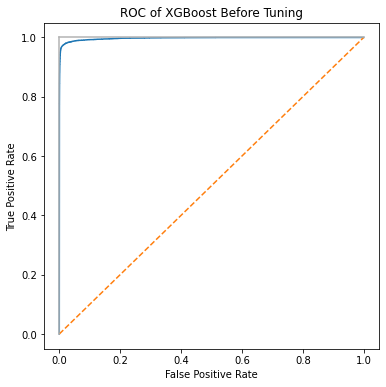

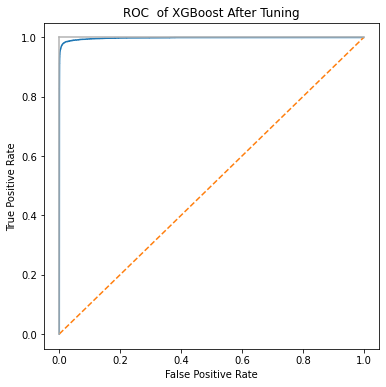

In [278]:
def plot_auc(y_test, y_pred_proba, titles):
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[::,1])
    
    plt.subplots(1, figsize=(6,6))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.title(titles)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_val, y_pred_proba_default, 'ROC of XGBoost Before Tuning')
plot_auc(y_val, y_pred_proba_tuned, 'ROC  of XGBoost After Tuning')

#### *Feature Importance*

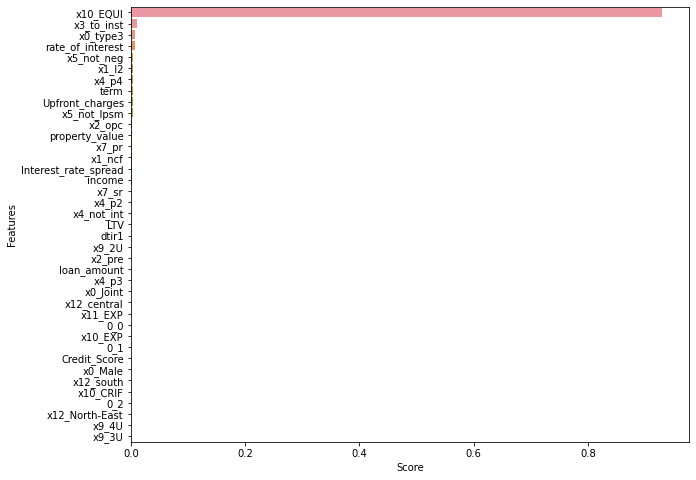

In [282]:
features_final = selected_feature

df_feature_importance_final = pd.DataFrame(data={
    'Features': features_final,
    'Score': final_model['model'].feature_importances_,
})

plt.figure(figsize=(10,8))
df_feature_importance_final = df_feature_importance_final.sort_values('Score', ascending=False)
sns.barplot(data=df_feature_importance_final, x='Score', y='Features')
plt.show()

#### *Shap Analysis*

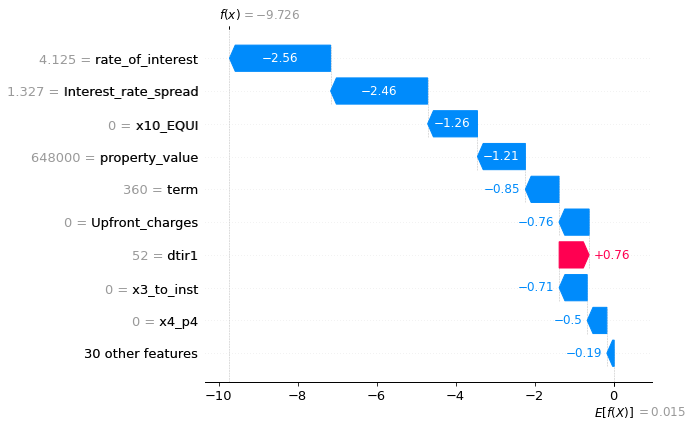

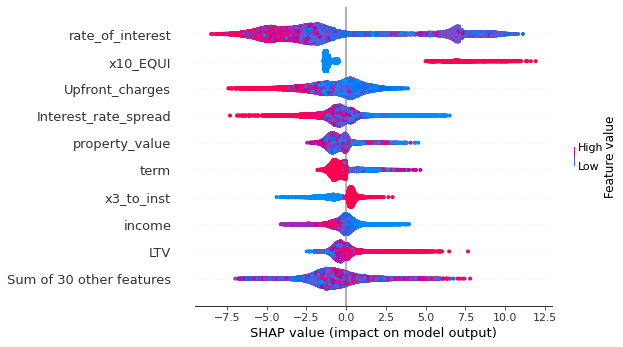

In [285]:
# shap model
explainer = shap.Explainer(final_model['model'])
shap_values = explainer(X_test_us_feature_selected)

# visualize
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)